In [1]:
# Import our standard libraries.
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns  # for nicer plots
sns.set(style='darkgrid')  # default style
import tensorflow as tf
import pandas as pd

In [2]:
from tensorflow.keras.datasets import mnist
np.random.seed(0) # For reproducibility purposes

# Load the MNIST dataset.
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

# Normalize pixel values
X_train = X_train / 255.
X_test = X_test / 255.

# Add an extra dimension for color channels. Since these images are greyscale,
# there's only 1 channel, but the Conv layer expects a channel dim.
X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)

print(X_train.shape)
print(Y_train.shape)

11501568/11490434 [==============================] - 0s 0us/step
(60000, 28, 28, 1)
(60000,)


In [77]:
image = np.expand_dims(X_test[0], axis=0)  # (28, 28, 1)
conv = tf.keras.layers.Conv2D(filters=32, kernel_size=5, activation='relu', padding='valid')
print('Filter map shape:', conv(image).shape)
weights, biases = conv.get_weights()
print('Filter shape:', weights.shape)
print('Biases:', biases.shape)

Filter map shape: (1, 24, 24, 32)
Filter shape: (5, 5, 1, 32)
Biases: (32,)


(28, 28, 1)
(None, 26, 26, 1)
(3, 3, 1, 1)
(1, 26, 26, 1)


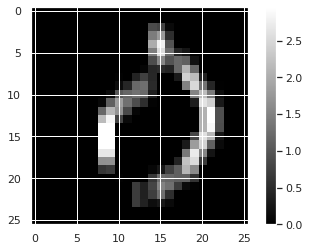

In [79]:
image = X_test[3]
print(image.shape)
filter = np.array([[1, 0, -1],
                   [1, 0, -1],
                   [1, 0, -1]])

input = tf.keras.layers.Input(shape=image.shape)
output = tf.keras.layers.Conv2D(filters=1, kernel_size=3, activation='relu', padding='valid', use_bias=False)(input)
model = tf.keras.Model(inputs=input, outputs=output)
print(output.shape)

weights = model.layers[1].get_weights()[0]
print(weights.shape)

model.layers[1].set_weights([filter.reshape((3,3,1,1))])
res = model(np.expand_dims(image, axis=0))
print(res.shape)

#plt.imshow(np.squeeze(image), cmap='gray')
plt.imshow(np.squeeze(res), cmap='gray')
plt.colorbar()
plt.show()

In [3]:
def build_ffnn():
  tf.keras.backend.clear_session()
  tf.random.set_seed(0)

  model = tf.keras.Sequential()
  model.add(tf.keras.layers.InputLayer(input_shape=X_train[0].shape))
  model.add(tf.keras.layers.Flatten())
  model.add(tf.keras.layers.Dense(units=128, activation='relu'))
  model.add(tf.keras.layers.Dense(units=128, activation='relu'))
  model.add(tf.keras.layers.Dense(units=10, activation='softmax'))

  model.compile(loss=tf.keras.losses.sparse_categorical_crossentropy,
                optimizer='adam', metrics=['accuracy'])
  return model

In [4]:
ffnn = build_ffnn()
ffnn.summary()
history = ffnn.fit(
    x=X_train,
    y=Y_train,
    batch_size=32,
    epochs=3,
    validation_split=0.1)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________
Epoch 1/3
1688/1688 [==============================] - 8s 4ms/step - loss: 0.2444 - accuracy: 0.9278 - val_loss: 0.1107 - val_accuracy: 0.9680
Epoch 2/3
1688/1688 [==================

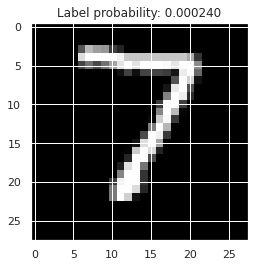

In [5]:
image = np.squeeze(X_test[0])
image = np.roll(image, -4, axis=0)

preds = ffnn.predict(np.expand_dims(image, axis=0))[0]
prob = preds[Y_test[0]]
plt.imshow(image, cmap='gray')
plt.title('Label probability: %.6f' %prob)
plt.show()

In [6]:
def build_cnn():
  tf.keras.backend.clear_session()
  tf.random.set_seed(0)

  model = tf.keras.Sequential()
  model.add(tf.keras.layers.InputLayer(input_shape=X_train[0].shape))

  model.add(tf.keras.layers.Conv2D(
      filters=32, kernel_size=5, activation='relu', padding='valid'))
  model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
  
  model.add(tf.keras.layers.Conv2D(
      filters=16, kernel_size=3, activation='relu', padding='valid'))
  model.add(tf.keras.layers.MaxPooling2D(pool_size=2))

  model.add(tf.keras.layers.Flatten())
  model.add(tf.keras.layers.Dense(units=10, activation='softmax'))

  model.compile(loss=tf.keras.losses.sparse_categorical_crossentropy,
                optimizer='adam', metrics=['accuracy'])
  return model

In [7]:
cnn = build_cnn()
cnn.summary()
history = cnn.fit(
    x=X_train,
    y=Y_train,
    batch_size=32,
    epochs=3,
    validation_split=0.1)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 16)        4624      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 16)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 400)               0         
                                                                 
 dense (Dense)               (None, 10)                4

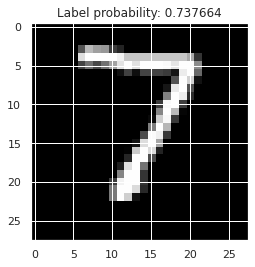

In [8]:
image = np.squeeze(X_test[0])
image = np.roll(image, -4, axis=0)

preds = cnn.predict(np.expand_dims(image, axis=0))[0]
prob = preds[Y_test[0]]
plt.imshow(image, cmap='gray')
plt.title('Label probability: %.6f' %prob)
plt.show()